<a href="https://colab.research.google.com/github/vishnudas-1212/machine-learning/blob/main/Decesion_tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [4]:
df=pd.read_csv("/content/Buy_Computer.csv",index_col=0)

In [5]:
df


,age,income,student,credit_rating,Buy_Computer
id,,,,,
1,youth,high,no,fair,no
2,youth,high,no,excellent,no
3,middle_age,high,no,fair,yes
4,senior,medium,no,fair,yes
5,senior,low,yes,fair,yes
6,senior,low,yes,excellent,no
7,middle_age,low,yes,excellent,yes
8,youth,medium,no,fair,no
9,youth,low,yes,fair,yes


In [6]:
df.isna().sum()

age              0
income           0
student          0
credit_rating    0
Buy_Computer     0
dtype: int64

In [7]:
df

,age,income,student,credit_rating,Buy_Computer
id,,,,,
1,youth,high,no,fair,no
2,youth,high,no,excellent,no
3,middle_age,high,no,fair,yes
4,senior,medium,no,fair,yes
5,senior,low,yes,fair,yes
6,senior,low,yes,excellent,no
7,middle_age,low,yes,excellent,yes
8,youth,medium,no,fair,no
9,youth,low,yes,fair,yes


In [8]:
#preprocessing
#we are converting the categorical data to numerical data


from sklearn.preprocessing import LabelEncoder

In [9]:
label=LabelEncoder()

In [10]:
df=df.apply(label.fit_transform)

In [11]:
df

,age,income,student,credit_rating,Buy_Computer
id,,,,,
1,2,0,0,1,0
2,2,0,0,0,0
3,0,0,0,1,1
4,1,2,0,1,1
5,1,1,1,1,1
6,1,1,1,0,0
7,0,1,1,0,1
8,2,2,0,1,0
9,2,1,1,1,1


In [12]:
X=df.iloc[:,:-1]

In [13]:
y=df.iloc[:,-1]

In [14]:
X

,age,income,student,credit_rating
id,,,,
1,2,0,0,1
2,2,0,0,0
3,0,0,0,1
4,1,2,0,1
5,1,1,1,1
6,1,1,1,0
7,0,1,1,0
8,2,2,0,1
9,2,1,1,1


In [15]:
y

id
1     0
2     0
3     1
4     1
5     1
6     0
7     1
8     0
9     1
10    1
11    1
12    1
13    1
14    0
Name: Buy_Computer, dtype: int64

In [19]:
#modeling

from sklearn.tree import DecisionTreeClassifier

In [20]:
model=DecisionTreeClassifier()

In [22]:
#training

model.fit(X,y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [23]:
y_pred=model.predict(X)

In [24]:
y_pred

array([0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0])

In [26]:
new_df=df.copy()

In [27]:
new_df['predicted']=y_pred

In [28]:
new_df

,age,income,student,credit_rating,Buy_Computer,predicted
id,,,,,,
1,2,0,0,1,0,0
2,2,0,0,0,0,0
3,0,0,0,1,1,1
4,1,2,0,1,1,1
5,1,1,1,1,1,1
6,1,1,1,0,0,0
7,0,1,1,0,1,1
8,2,2,0,1,0,0
9,2,1,1,1,1,1


In [29]:
from sklearn.metrics import accuracy_score,recall_score,classification_report,confusion_matrix

In [30]:
accuracy_score(y,y_pred)

1.0

In [31]:
confusion_matrix(y,y_pred)

array([[5, 0],
       [0, 9]])

In [32]:
#tree plotting


from sklearn import tree

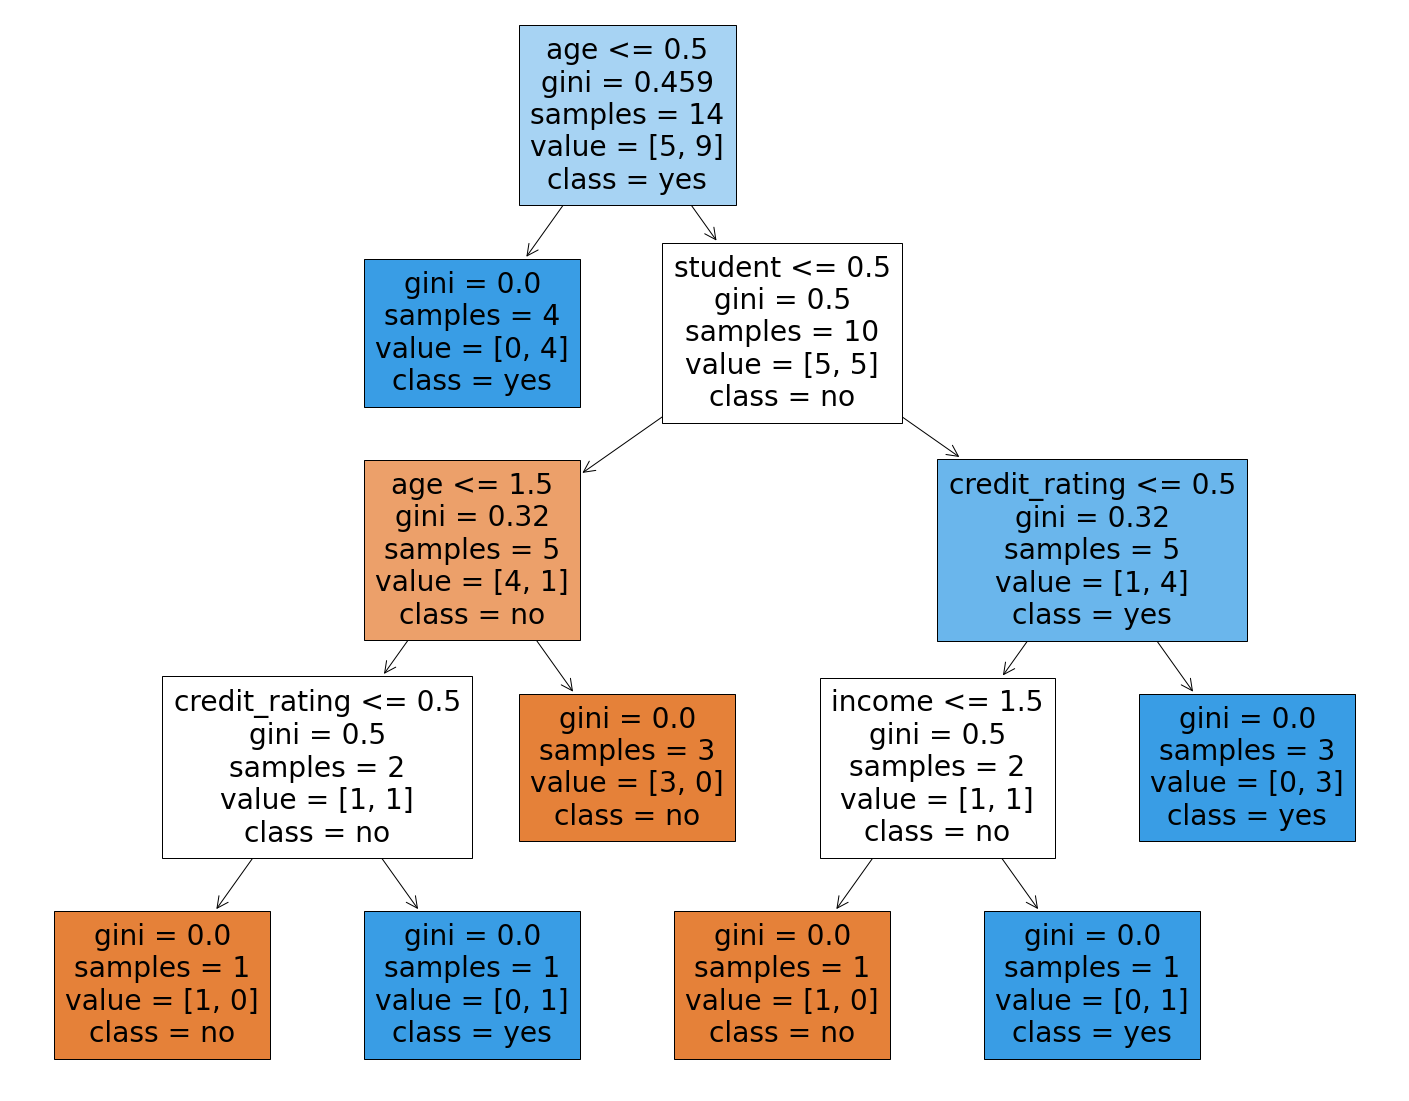

In [35]:
fig=plt.figure(figsize=(25,20))
_=tree.plot_tree(model,feature_names=df.columns,class_names=['no','yes'],label='all',filled=True)

In [37]:
from sklearn import datasets

In [39]:
iris=datasets.load_iris()   #default this dataset is given in sklearn

In [40]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [41]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [44]:
y=iris.target

In [45]:
x=iris.data

In [46]:
#train and test split
from sklearn.model_selection import train_test_split

In [48]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=42)

In [49]:
x_train

array([[5.7, 2.9, 4.2, 1.3],
       [7.6, 3. , 6.6, 2.1],
       [5.6, 3. , 4.5, 1.5],
       [5.1, 3.5, 1.4, 0.2],
       [7.7, 2.8, 6.7, 2. ],
       [5.8, 2.7, 4.1, 1. ],
       [5.2, 3.4, 1.4, 0.2],
       [5. , 3.5, 1.3, 0.3],
       [5.1, 3.8, 1.9, 0.4],
       [5. , 2. , 3.5, 1. ],
       [6.3, 2.7, 4.9, 1.8],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [5.6, 2.7, 4.2, 1.3],
       [5.1, 3.4, 1.5, 0.2],
       [5.7, 3. , 4.2, 1.2],
       [7.7, 3.8, 6.7, 2.2],
       [4.6, 3.2, 1.4, 0.2],
       [6.2, 2.9, 4.3, 1.3],
       [5.7, 2.5, 5. , 2. ],
       [5.5, 4.2, 1.4, 0.2],
       [6. , 3. , 4.8, 1.8],
       [5.8, 2.7, 5.1, 1.9],
       [6. , 2.2, 4. , 1. ],
       [5.4, 3. , 4.5, 1.5],
       [6.2, 3.4, 5.4, 2.3],
       [5.5, 2.3, 4. , 1.3],
       [5.4, 3.9, 1.7, 0.4],
       [5. , 2.3, 3.3, 1. ],
       [6.4, 2.7, 5.3, 1.9],
       [5. , 3.3, 1.4, 0.2],
       [5. , 3.2, 1.2, 0.2],
       [5.5, 2.4, 3.8, 1.1],
       [6.7, 3

In [50]:
#training model

from sklearn.tree import DecisionTreeClassifier

In [71]:
iris_model=DecisionTreeClassifier(random_state=10 ,criterion='entropy')

In [54]:
iris_model.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=10, splitter='best')

In [56]:
iris_pred=iris_model.predict(x_test)

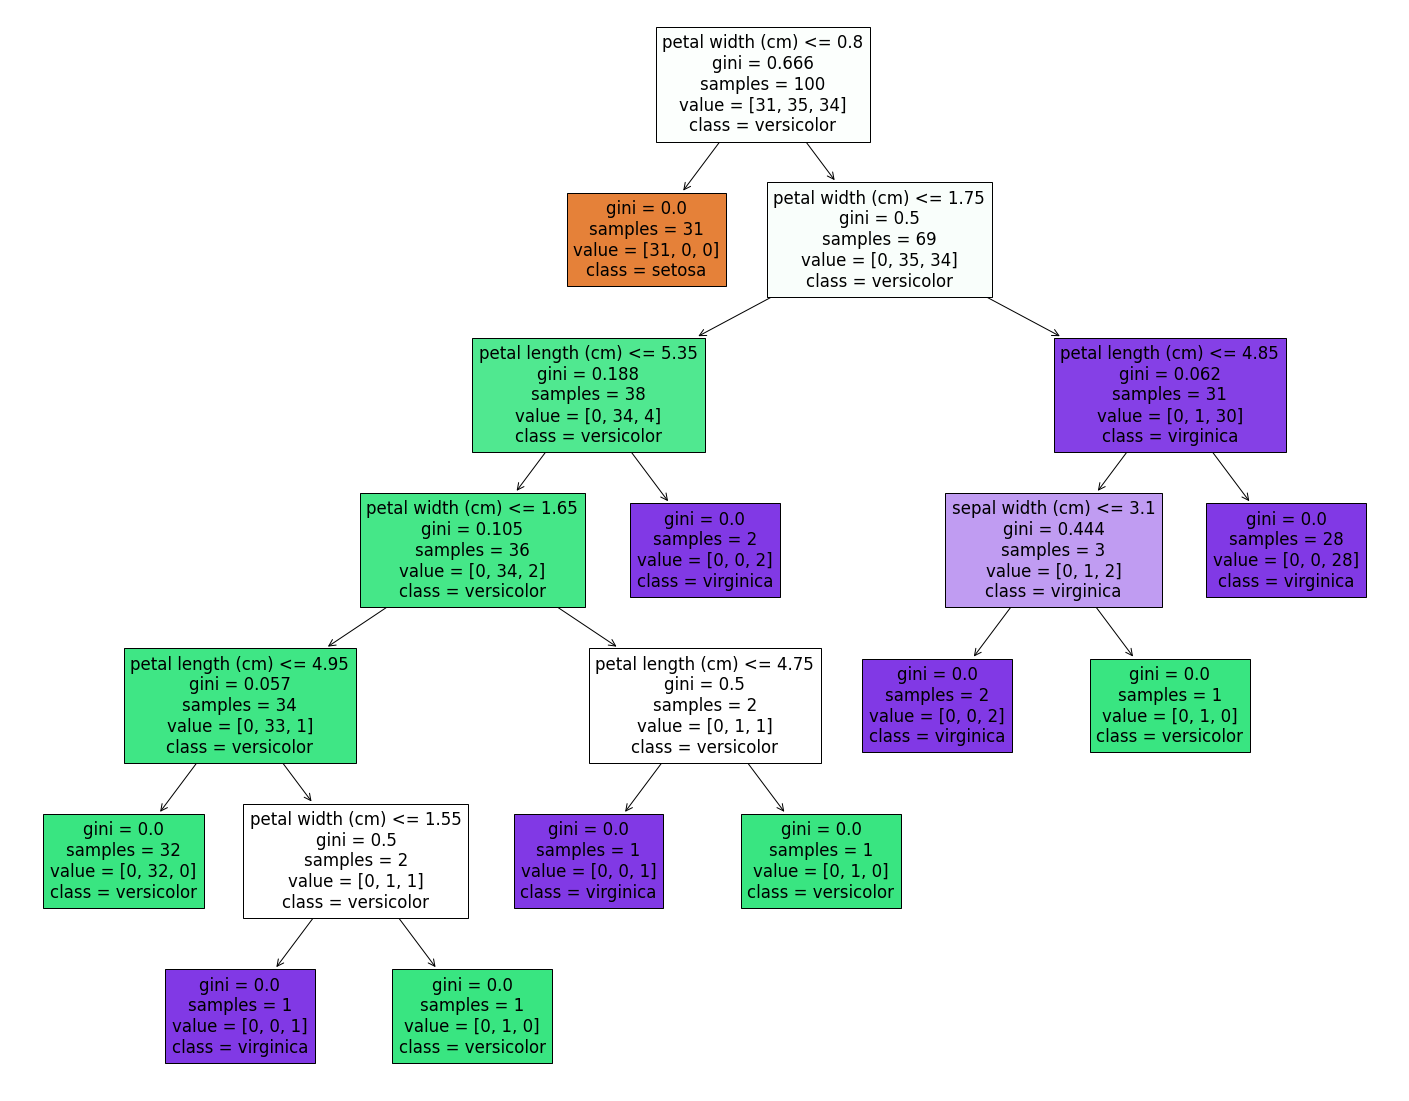

In [68]:
fig=plt.figure(figsize=(25,20))
_=tree.plot_tree(iris_model,feature_names=iris.feature_names,class_names=iris.target_names,label='all',filled=True)

In [63]:
iris.describe()

AttributeError: ignored

In [66]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [67]:
accuracy_score(y_test,iris_pred)

1.0

In [69]:
pd.crosstab(y_test,iris_pred)

col_0,0,1,2
row_0,,,
0,19,0,0
1,0,15,0
2,0,0,16
